#                                    House Price Predictions


![title](https://cdn.pixabay.com/photo/2016/10/06/13/38/houses-1719055_960_720.png)

How do you search for your house!? I bet, the 1st thing cross the mind is the price. Price plays a important role in buying the house. The features such as area, number of bedrooms , amenities all play major factors which determine the price of the houses. 

In this dataset,we will be looking into various features which determine the price and factors that determines it.

The dataset is downloaded from kaggle at this link : https://www.kaggle.com/c/house-prices-advanced-regression-techniques .


We will we be working on the data explorations, analysis and cleaning to predict the prices of the houses.

In [1]:
# Import the necessary datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
pd.set_option('display.max_columns',100)

In [3]:
train=pd.read_csv('/Users/anoopsp/Desktop/Data Science Portfolio Projects/datasets/home-data-for-ml-course/train.csv')

In [4]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [5]:
Null_values=[columns for columns in train.columns if train[columns].isna().sum()>0]

In [6]:
for col in Null_values:
    print(f'The percentage of missing value in {col}',np.round(train[col].isna().sum()/train.shape[0] *100,2),'%')

The percentage of missing value in LotFrontage 17.74 %
The percentage of missing value in Alley 93.77 %
The percentage of missing value in MasVnrType 0.55 %
The percentage of missing value in MasVnrArea 0.55 %
The percentage of missing value in BsmtQual 2.53 %
The percentage of missing value in BsmtCond 2.53 %
The percentage of missing value in BsmtExposure 2.6 %
The percentage of missing value in BsmtFinType1 2.53 %
The percentage of missing value in BsmtFinType2 2.6 %
The percentage of missing value in Electrical 0.07 %
The percentage of missing value in FireplaceQu 47.26 %
The percentage of missing value in GarageType 5.55 %
The percentage of missing value in GarageYrBlt 5.55 %
The percentage of missing value in GarageFinish 5.55 %
The percentage of missing value in GarageQual 5.55 %
The percentage of missing value in GarageCond 5.55 %
The percentage of missing value in PoolQC 99.52 %
The percentage of missing value in Fence 80.75 %
The percentage of missing value in MiscFeature 96.

We notice these columns has missing values , we need to understand how these missing values has any effect on SalePrice values.

We need to identify Numerical and Categorical columns for further analysis.

In [7]:
Numerical_columns=train.select_dtypes(exclude='object').columns

In [8]:
train[Numerical_columns]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

In [9]:
Categorical_columns=train.select_dtypes(include='object').columns

In [10]:
train[Categorical_columns].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [11]:
(len(Numerical_columns)+len(Categorical_columns))==len(train.columns)

True

We have divided our columns into numerical and categorical , we will explore these columns to do a exploratory data analysis. We noticed year sold column, will have a check how the trend of the sale price.

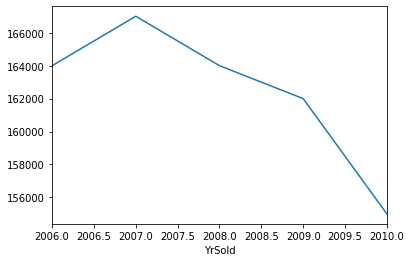

In [12]:
train.groupby('YrSold')['SalePrice'].median().plot();